In [4]:
import matplotlib.pyplot as plt
import numpy as np

from hazma.decay import charged_pion as dnde_pi
from hazma.parameters import charged_pion_mass as mpi
from utilities import latex_text_width_1col, colors

**Generates plots of the contributions to the charged pion radiative decay spectrum.**

In [5]:
# Pion energy
e_pi = 1.0001 * mpi
# Photon energies
e_gams = np.logspace(0, 2, num=200)

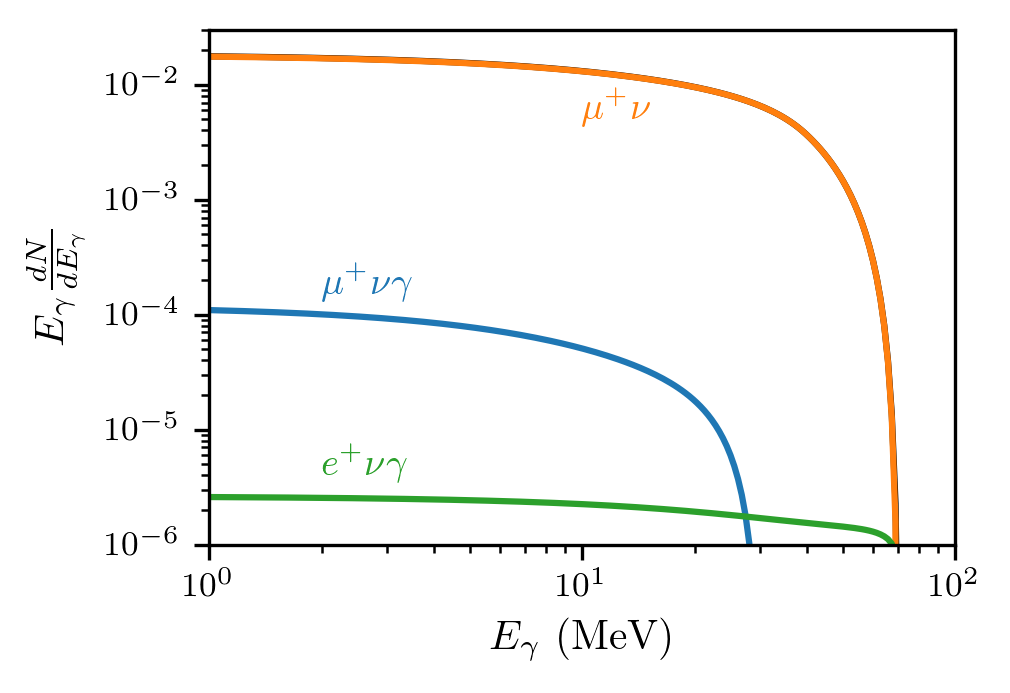

In [6]:
fig, ax = plt.subplots(
    1, 1, figsize=(0.5 * latex_text_width_1col, 0.35 * latex_text_width_1col)
)

# Plot all the contributions
dnde_total = dnde_pi(e_gams, e_pi, mode="total")
ax.loglog(e_gams, e_gams * dnde_total, "k", label="Total")

dnde_munug = dnde_pi(e_gams, e_pi, mode="munug")
ax.loglog(e_gams, e_gams * dnde_munug, label=r"$\mu^{+}\nu\gamma$")

dnde_munu = dnde_pi(e_gams, e_pi, mode="munu")
ax.loglog(e_gams, e_gams * dnde_munu, label=r"$\mu^{+}\nu$")

dnde_enug = dnde_pi(e_gams, e_pi, mode="enug")
ax.loglog(e_gams, e_gams * dnde_enug, label=r"$e^{+}\nu\gamma$")

# Formatting
plt.xlim(e_gams[[0, -1]])
plt.ylim([1e-6, 3e-2])
plt.xlabel(r"$E_{\gamma}$ (MeV)")
plt.ylabel(r"$E_\gamma \frac{dN}{dE_\gamma}$")
plt.text(1e1, 5e-3, r"$\mu^+ \nu$", fontsize=9, color=colors[1])
plt.text(2e0, 1.5e-4, r"$\mu^+ \nu \gamma$", fontsize=9, color=colors[0])
plt.text(2e0, 4e-6, r"$e^+ \nu \gamma$", fontsize=9, color=colors[2])

plt.tight_layout()
plt.savefig("figures/charged_pion_decay.pdf", bbox_inches="tight")
plt.show()